In [1]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from utils import columns, dates,metrics, get_data_pred
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from utils import columns

In [4]:
df = pd.read_csv('../data/agri/Saska_stuff/united_data_soybean.csv', index_col=0)

## First let's try some models excluding rows containing nan values

In [5]:
X = df.dropna().drop('Soybean_Yield', axis=1)
y = df.dropna()['Soybean_Yield']
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Linear regression is too simple, performs poorly on the data

In [6]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

-2.545688512596236e+24

In [7]:
mean_squared_error(y_test, reg.predict(X_test))

3.0247653995931307e+26

#### Multilayer Perceptron seems to perform better, we do a cross-validation and get a mean score of 0.82, with a mean-squared error of 21


In [13]:
reg = MLPRegressor(max_iter=500).fit(X_train, y_train)
reg.score(X_test, y_test)

0.8228331759992588

In [14]:
mean_squared_error(y_test, reg.predict(X_test))

21.050811069054134

In [15]:
cross_val_score(reg, X, y, cv=5).mean()

0.7431080599610331

## Lets try a models that can work with nan values

In [16]:
y = df['Soybean_Yield']
X = df.drop(columns=['Soybean_Yield'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [18]:
reg = HistGradientBoostingRegressor().fit(X_train, y_train)

In [19]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

26.63339114113042

In [20]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.9480584012346498

In [21]:
cross_val_score(reg, X, y, cv=5).mean()

0.8409758966493722

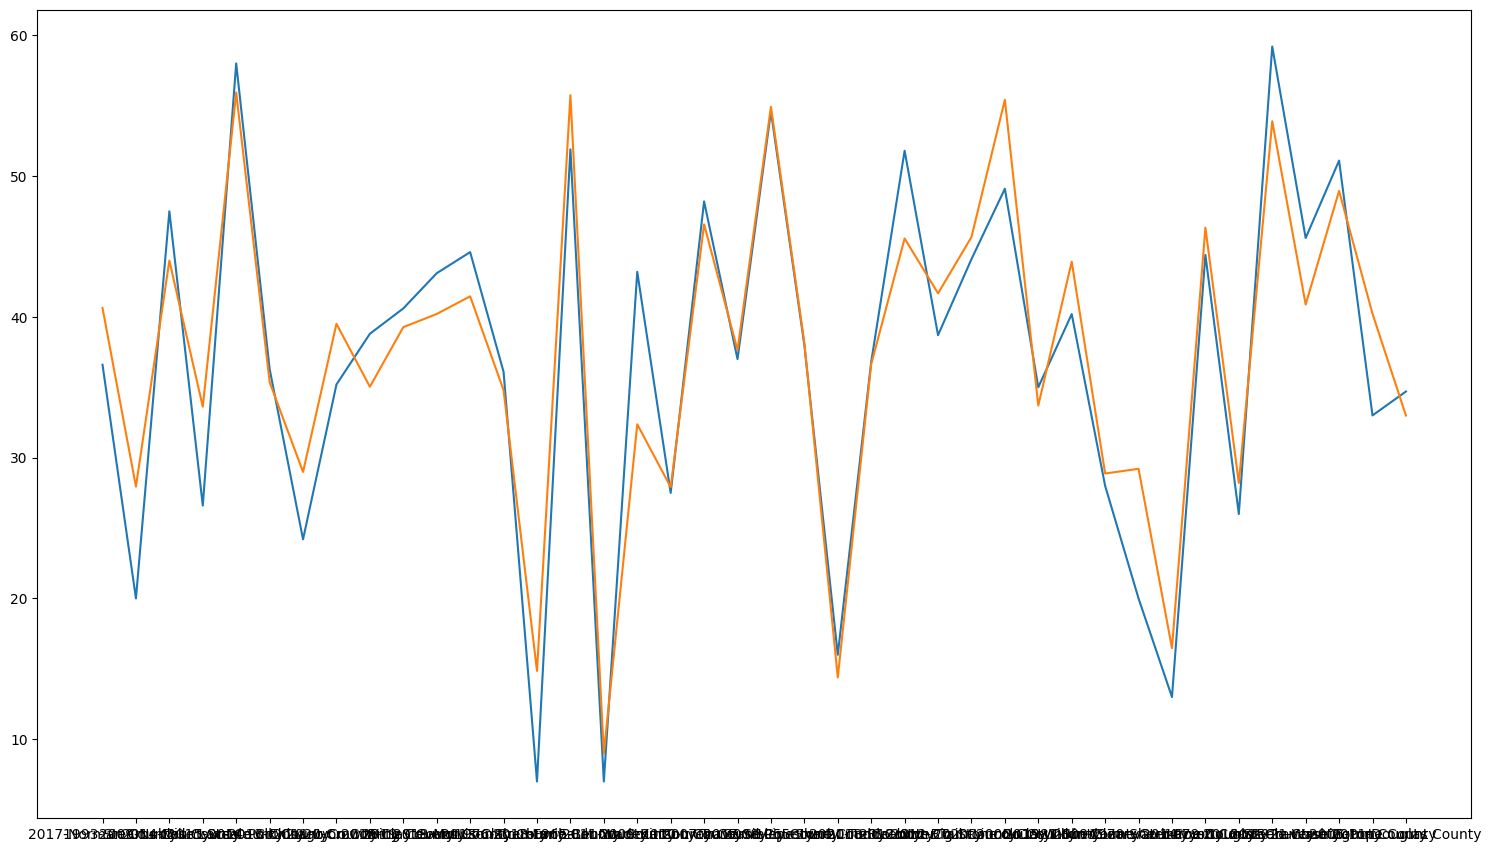

In [22]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [23]:
from lightgbm import LGBMRegressor, plot_importance

In [24]:
reg = LGBMRegressor().fit(X_train, y_train)

In [25]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

26.160972387402467

In [26]:
res_y_test = reg.predict(X_test)
reg.score(X,y)

0.9487904276106801

In [27]:
fi = reg.feature_importances_
np.argwhere(fi > 15)
columns[np.argwhere(fi > 10)]

array([['01-11-max'],
       ['01-13-avg'],
       ['01-13-min'],
       ['01-26-min'],
       ['03-16-min'],
       ['03-19-min'],
       ['03-24-avg'],
       ['03-24-min'],
       ['05-09-max'],
       ['05-18-max'],
       ['05-21-min'],
       ['05-26-avg'],
       ['06-06-min'],
       ['06-15-min'],
       ['06-20-min'],
       ['06-20-max'],
       ['06-21-min'],
       ['06-27-min'],
       ['07-09-min'],
       ['07-18-avg'],
       ['07-26-avg'],
       ['07-26-min'],
       ['07-26-max'],
       ['08-02-min'],
       ['09-03-avg'],
       ['09-13-min'],
       ['09-14-min'],
       ['09-15-min'],
       ['09-16-avg'],
       ['09-16-max'],
       ['09-23-avg'],
       ['09-23-max'],
       ['09-24-avg'],
       ['09-24-max'],
       ['09-27-max']], dtype='<U10')

In [28]:
cross_val_score(reg, X, y, cv=5).mean()

0.8418924193330612

In [29]:
res = reg.predict(get_data_pred('ACAvNTuEuFWcmwms'))
res

array([33.38722551, 25.34369652, 24.81817616, 31.60824807, 36.45885646,
       31.25891577, 36.94749389, 27.54482156, 29.47793212, 35.47216033,
       45.37276353, 31.84056767, 40.24147502, 32.91773974, 41.85333235,
       33.7106823 , 32.0784497 ])

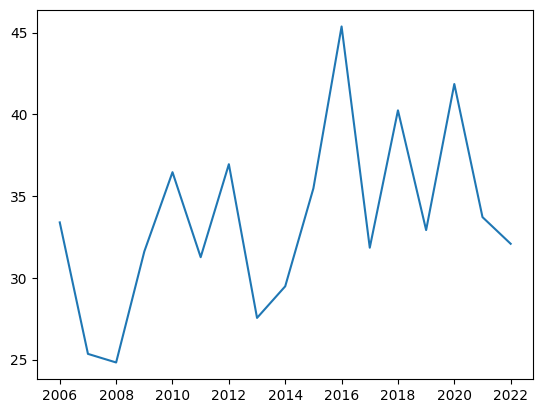

In [30]:
plt.plot( range(2006,2023), res)

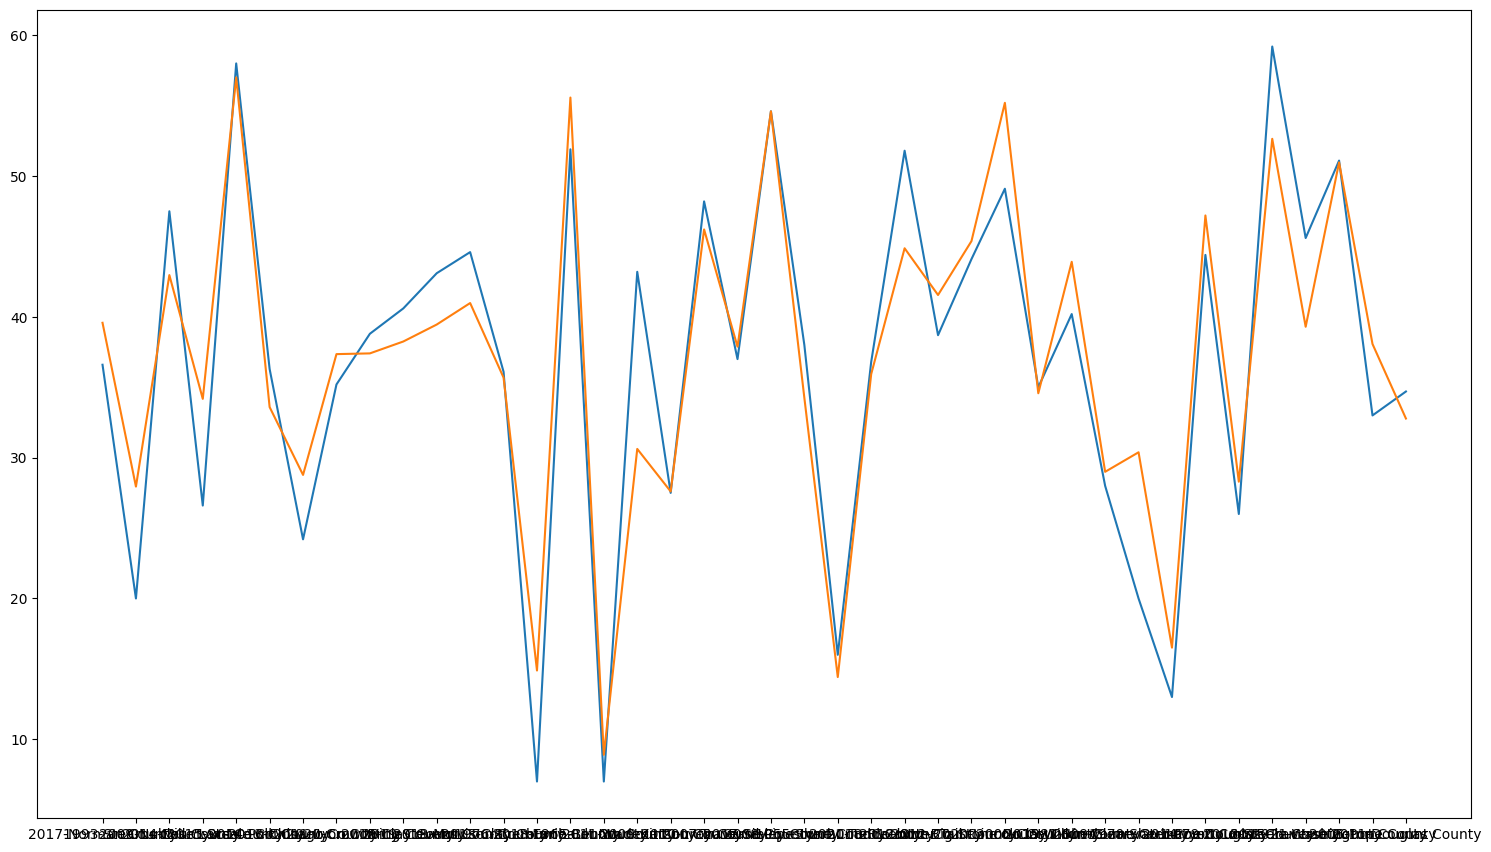

In [31]:
plt.plot(y_test[:40])
plt.plot(res_y_test[:40])
fig = plt.get_current_fig_manager()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [32]:
from catboost import CatBoostRegressor

In [33]:
reg = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.040414
0:	learn: 12.3102408	total: 196ms	remaining: 3m 16s
1:	learn: 12.0852054	total: 247ms	remaining: 2m 3s
2:	learn: 11.8538614	total: 296ms	remaining: 1m 38s
3:	learn: 11.6479771	total: 345ms	remaining: 1m 25s
4:	learn: 11.4292480	total: 408ms	remaining: 1m 21s
5:	learn: 11.2362695	total: 475ms	remaining: 1m 18s
6:	learn: 11.0332891	total: 528ms	remaining: 1m 14s
7:	learn: 10.8363516	total: 589ms	remaining: 1m 13s
8:	learn: 10.6792402	total: 694ms	remaining: 1m 16s
9:	learn: 10.5081056	total: 758ms	remaining: 1m 15s
10:	learn: 10.3479808	total: 815ms	remaining: 1m 13s
11:	learn: 10.2010731	total: 869ms	remaining: 1m 11s
12:	learn: 10.0305835	total: 918ms	remaining: 1m 9s
13:	learn: 9.8363798	total: 970ms	remaining: 1m 8s
14:	learn: 9.6745564	total: 1.02s	remaining: 1m 7s
15:	learn: 9.5318243	total: 1.07s	remaining: 1m 6s
16:	learn: 9.4104622	total: 1.13s	remaining: 1m 5s
17:	learn: 9.2795274	total: 1.21s	remaining: 1m 5s
18:	learn: 9.1469593	total: 1.26s	rema

In [34]:
mse = mean_squared_error(y_test, reg.predict(X_test))
mse

28.34653130835025

In [35]:
cross_val_score(reg, X, y, cv=5).mean()

Learning rate set to 0.040832
0:	learn: 12.4329245	total: 46.3ms	remaining: 46.2s
1:	learn: 12.2021483	total: 91.2ms	remaining: 45.5s
2:	learn: 11.9643962	total: 135ms	remaining: 44.7s
3:	learn: 11.7216382	total: 176ms	remaining: 43.9s
4:	learn: 11.4773146	total: 220ms	remaining: 43.9s
5:	learn: 11.2706139	total: 261ms	remaining: 43.3s
6:	learn: 11.0550962	total: 305ms	remaining: 43.2s
7:	learn: 10.8610461	total: 352ms	remaining: 43.7s
8:	learn: 10.6739482	total: 398ms	remaining: 43.9s
9:	learn: 10.5107150	total: 442ms	remaining: 43.7s
10:	learn: 10.3378802	total: 486ms	remaining: 43.7s
11:	learn: 10.1796853	total: 531ms	remaining: 43.7s
12:	learn: 9.9995169	total: 576ms	remaining: 43.7s
13:	learn: 9.8438873	total: 621ms	remaining: 43.8s
14:	learn: 9.6846304	total: 665ms	remaining: 43.7s
15:	learn: 9.5347409	total: 711ms	remaining: 43.7s
16:	learn: 9.3957156	total: 756ms	remaining: 43.7s
17:	learn: 9.2709990	total: 800ms	remaining: 43.7s
18:	learn: 9.1346875	total: 847ms	remaining: 43.

0.8286042575423966